# Importing softwares libraries and Loading the dataset (Liar Liar)

In [1]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [2]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\train.csv')
test_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\test.csv')
valid_news = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\valid.csv')

# Data Preparation

training dataset size:
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   T

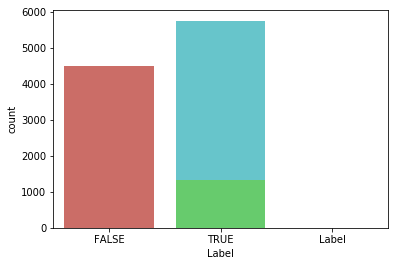

In [3]:
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))
    
data_obs()
    
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()
    
#uality check - 
    
data_qualityCheck()
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]



In [4]:
#show the distribution of labels in the train and test data
"""def create_datafile(filename)
    #function to slice the dataframe to keep variables necessary to be used for classification
    return "return df to be used"
"""
    
"""#converting multiclass labels present in our datasets to binary class labels
for i , row in data_TrainNews.iterrows():
    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):
        data_TrainNews.iloc[:,0] = "true"
    else :
        data_TrainNews.iloc[:,0] = "false"
        
for i,row in data_TrainNews.iterrows():
    print(row)
"""

'#converting multiclass labels present in our datasets to binary class labels\nfor i , row in data_TrainNews.iterrows():\n    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):\n        data_TrainNews.iloc[:,0] = "true"\n    else :\n        data_TrainNews.iloc[:,0] = "false"\n        \nfor i,row in data_TrainNews.iterrows():\n    print(row)\n'

# Feature Selection

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk
nltk.download()
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


C:\Users\PB\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)

print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

In [7]:
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

In [8]:
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


In [9]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [10]:
#bag of words - with n-grams
countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [11]:
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    


In [12]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [13]:
#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train_news['Statement']
print(training_sentences)

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
5        The Chicago Bears have had more starting quart...
6        Jim Dunnam has not lived in the district he re...
7        I'm the only person on this stage who has work...
8        However, it took $19.5 million in Oregon Lotte...
9        Says GOP primary opponents Glenn Grothman and ...
10       For the first time in history, the share of th...
11       Since 2000, nearly 12 million Americans have s...
12       When Mitt Romney was governor of Massachusetts...
13       The economy bled $24 billion due to the govern...
14       Most of the (Affordable Care Act) has already ...
15       In this last election in November, ... 63 perc...
16       McCain opposed a requirement that the governme.

In [14]:
#Using Word2Vec 
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done."),len(model)," words loaded!"
    return model

# with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

In [15]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


"""
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

"""

"\nclass TfidfEmbeddingVectorizer(object):\n    def __init__(self, word2vec):\n        self.word2vec = word2vec\n        self.word2weight = None\n        self.dim = len(word2vec.itervalues().next())\n\n    def fit(self, X, y):\n        tfidf = TfidfVectorizer(analyzer=lambda x: x)\n        tfidf.fit(X)\n        # if a word was never seen - it must be at least as infrequent\n        # as any of the known words - so the default idf is the max of \n        # known idf's\n        max_idf = max(tfidf.idf_)\n        self.word2weight = defaultdict(\n            lambda: max_idf,\n            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])\n\n        return self\n\n    def transform(self, X):\n        return np.array([\n                np.mean([self.word2vec[w] * self.word2weight[w]\n                         for w in words if w in self.word2vec] or\n                        [np.zeros(self.dim)], axis=0)\n                for words in X\n            ])\n\n"

# Classification

In [16]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#string to test
doc_new = ['obama is running for president in 2016']

In [18]:
#Using bag of words
#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_nb = nb_pipeline.predict(test_news['Statement'])
np.mean(predicted_nb == test_news['Label'])


#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['Statement'])
np.mean(predicted_LogR == test_news['Label'])


#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_svm = svm_pipeline.predict(test_news['Statement'])
np.mean(predicted_svm == test_news['Label'])


#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_sgd = sgd_pipeline.predict(test_news['Statement'])
np.mean(predicted_sgd == test_news['Label'])


#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['Statement'],train_news['Label'])
predicted_rf = random_forest.predict(test_news['Statement'])
np.mean(predicted_rf == test_news['Label'])


#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n=len(train_news), n_folds=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold:
        train_text = train_news.iloc[train_ind]['Statement'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text = train_news.iloc[test_ind]['Statement']
        test_y = train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))
    
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)


C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]
Total statements classified: 10240
Score: 0.6467929151165771
score length 5
Confusion matrix:
[[2252 2236]
 [1934 3818]]
Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:

Total statements classified: 10240
Score: 0.6489265899683886
score length 5
Confusion matrix:
[[2262 2226]
 [1919 3833]]


KeyboardInterrupt: 

Bag of words confusion matrix and F1 scores

Naive bayes
[2118 2370]
[1664 4088]
f1-Score: 0.669611539651

Logistic regression
[2252 2236]
[1933 3819]
f1-Score: 0.646909097798

svm
[2260 2228]
[2246 3506]
f1-score: 0.610468748792

sgdclassifier
[2414 2074]
[2042 3710]
f1-Score: 0.640874558778

random forest classifier
[1821 2667]
[1192 4560]
f1-Score: 0.702651511011

In [19]:
##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_nb_ngram == test_news['Label'])


#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_LogR_ngram == test_news['Label'])


#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_svm_ngram == test_news['Label'])


#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
         ])

sgd_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_sgd_ngram == test_news['Label'])


#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['Statement'])
np.mean(predicted_rf_ngram == test_news['Label'])


#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)


C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]


C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:

Total statements classified: 10240
Score: 0.7190643331130575
score length 5
Confusion matrix:
[[   5 4483]
 [   6 5746]]


KeyboardInterrupt: 

n-grams & tfidf confusion matrix and F1 scores

Naive bayes
[841 3647]
[427 5325]
f1-Score: 0.723262051071

Logistic regression
[1617 2871]
[1097 4655]
f1-Score: 0.70113000531

svm
[2016 2472]
[1524 4228]
f1-Score: 0.67909201429

sgdclassifier
[  10 4478]
[  13 5739]
f1-Score: 0.718731637053

random forest
[1979 2509]
[1630 4122]
f1-Score: 0.665720333284

In [20]:
print(classification_report(test_news['Label'], predicted_nb_ngram))
print(classification_report(test_news['Label'], predicted_LogR_ngram))
print(classification_report(test_news['Label'], predicted_svm_ngram))
print(classification_report(test_news['Label'], predicted_sgd_ngram))
print(classification_report(test_news['Label'], predicted_rf_ngram))

             precision    recall  f1-score   support

      False       0.72      0.19      0.30      1169
       True       0.58      0.94      0.71      1382

avg / total       0.64      0.59      0.52      2551

             precision    recall  f1-score   support

      False       0.64      0.39      0.49      1169
       True       0.61      0.81      0.70      1382

avg / total       0.62      0.62      0.60      2551

             precision    recall  f1-score   support

      False       0.61      0.47      0.53      1169
       True       0.62      0.74      0.68      1382

avg / total       0.62      0.62      0.61      2551

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      1169
       True       0.54      1.00      0.70      1382

avg / total       0.29      0.54      0.38      2551

             precision    recall  f1-score   support

      False       0.58      0.48      0.53      1169
       True       0.62      0.70 

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
test_news['Label'].shape

"""
Out of all the models fitted, we would take 2 best performing model. we would call them candidate models
from the confusion matrix, we can see that random forest and logistic regression are best performing 
in terms of precision and recall (take a look into false positive and true negative counts which appeares
to be low compared to rest of the models)
"""

#grid-search parameter optimization
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

In [22]:
gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

{'mean_fit_time': array([ 1.03430629,  1.33770633,  1.8493367 ,  1.74957053,  2.76480722,
         2.63380551,  3.35320624,  3.70700661,  4.1704073 ,  4.16000732,
         1.49240255,  1.61200285,  2.15800365,  2.06960352,  2.97303923,
         2.91397262,  3.62960625,  3.97800692,  4.64527464,  4.69938207,
         1.78910931,  1.8422699 ,  2.16737048,  2.19983745,  3.25000572,
         3.20320559,  3.78643982,  4.08804043,  4.94520871,  4.67900864,
         1.72350311,  1.87200324,  2.38160412,  2.41800427,  3.11480538,
         3.15723904,  4.46160777,  4.5828747 ,  4.95460908,  4.86720848,
         2.1320037 ,  1.86763676,  2.41363764,  2.49080435,  3.4788061 ,
         3.58407315,  4.29504116,  4.37320773,  5.23934269,  5.2378761 ,
         2.10080361,  1.97080334,  2.69840511,  2.73793848,  3.5618062 ,
         3.65040644,  4.76260861,  4.70600843,  5.58044314,  5.56221048,
         2.12743719,  2.0176034 ,  2.73500482,  2.9898053 ,  4.24320745,
         4.22240726,  5.07107576, 

In [23]:
#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

{'mean_fit_time': array([0.21466724, 0.51756795, 0.48610075, 1.2676398 , 0.81457019,
        1.08333596, 1.07806842, 1.23323576, 1.62240275, 1.70560304,
        1.66920288, 1.81480328, 2.15780393, 2.20730392, 2.19440389,
        2.31400402, 2.67697144, 2.70154881, 2.75957529, 2.18503348]),
 'std_fit_time': array([0.02853296, 0.28727248, 0.30143675, 0.70022693, 0.1047248 ,
        0.09148916, 0.09711389, 0.19668594, 0.18502112, 0.10295501,
        0.09185041, 0.2768242 , 0.25034312, 0.2191421 , 0.19162573,
        0.88854753, 0.75111219, 0.76239049, 0.90318539, 0.26235729]),
 'mean_score_time': array([0.09360027, 0.1092004 , 0.10400033, 0.09570034, 0.18013374,
        0.17680041, 0.17680025, 0.16640011, 0.20280043, 0.20800018,
        0.20280035, 0.20800042, 0.24960041, 0.23920051, 0.24440034,
        0.24960033, 0.2772673 , 0.29050342, 0.29000457, 0.2772034 ]),
 'std_score_time': array([1.27375136e-02, 1.12391596e-07, 7.35395072e-03, 2.97011651e-03,
        6.45256689e-03, 7.35383832e-

In [24]:
#Linear SVM 
parameters = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'svm_tfidf__use_idf': (True, False),
               'svm_tfidf__smooth_idf': (True, False),
               'svm_clf__penalty': ('l1','l2'),
}

gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\PB\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\PB\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002A36540, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\PB\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\P...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002A36540, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\PB\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\P...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\PB\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\PB\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(584, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\PB\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(584, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (584, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=584, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 14, 6, 41, 57, 613098, tzinfo=tzutc()), 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'session': 'b88ae4e95f474be1876d1446f51eb304', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'b88ae4e95f474be1876d1446f51eb304']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 14, 6, 41, 57, 613098, tzinfo=tzutc()), 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'session': 'b88ae4e95f474be1876d1446f51eb304', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'b88ae4e95f474be1876d1446f51eb304'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 14, 6, 41, 57, 613098, tzinfo=tzutc()), 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'session': 'b88ae4e95f474be1876d1446f51eb304', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '4a08f60f01d0451b81be92408c12a167', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="#Linear SVM \nparameters = {'svm_tfidf__ngram_ran...est_score_\ngs_clf.best_params_\ngs_clf.cv_results_", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-24-ffd071b0f211>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1021cf60, execution_c...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000001C13E4B0, file "<ipython-input-24-ffd071b0f211>", line 9>
        result = <ExecutionResult object at 1021cf60, execution_c...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000001C13E4B0, file "<ipython-input-24-ffd071b0f211>", line 9>, result=<ExecutionResult object at 1021cf60, execution_c...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000001C13E4B0, file "<ipython-input-24-ffd071b0f211>", line 9>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport csv\nimport numpy as n...okenize import word_tokenize\nimport seaborn as sb', "test_filename = 'test.csv'\ntrain_filename = 'tra...machinelearning\\csvfiles\\liar_dataset\\valid.csv')", 'def data_obs():\n    print("training dataset size...turn [porter.stem(word) for word in text.split()]', '#show the distribution of labels in the train an... in data_TrainNews.iterrows():\n    print(row)\n"""', 'import pandas as pd\nimport numpy as np\nfrom skle...enize\nfrom gensim.models.word2vec import Word2Vec', "countV = CountVectorizer()\ntrain_count = countV....ement'].values)\n\nprint(countV)\nprint(train_count)", 'def get_countVectorizer_stats():\n    \n    #vocab... names\n    print(countV.get_feature_names()[:25])', '#tf-idf \ntfidfV = TfidfTransformer()\ntrain_tfidf...data feature names \n    print(train_tfidf.A[:10])', "tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)", "#bag of words - with n-grams\ncountV_ngram = Coun...',ngram_range=(1,4),use_idf=True,smooth_idf=True)", 'def features(sentence, index):\n    """ sentence:...ex][1:].lower() != sentence[index][1:]\n    }\n    ', 'def untag(tagged_sentence):\n    return [w for w, t in tagged_sentence]', "#POS Tagging\ntagged_sentences = nltk.corpus.tree...train_news['Statement']\nprint(training_sentences)", '#Using Word2Vec \nimport numpy as np\ndef loadGlov... line.split()[1:]))\n           for line in lines}', 'class MeanEmbeddingVectorizer(object):\n    def _...               for words in X\n            ])\n\n"""', 'import numpy as np\nimport pandas as pd\nimport pi...om sklearn.metrics import average_precision_score', "#string to test\ndoc_new = ['obama is running for president in 2016']", '#Using bag of words\n#building classifier using n...d_pipeline)\nbuild_confusion_matrix(random_forest)', '##Now using n-grams\n#naive-bayes classifier\nnb_p...gram)\nbuild_confusion_matrix(random_forest_ngram)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MeanEmbeddingVectorizer': <class '__main__.MeanEmbeddingVectorizer'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {4: '#converting multiclass labels present in our dat...row in data_TrainNews.iterrows():\n    print(row)\n', 15: '\nclass TfidfEmbeddingVectorizer(object):\n    def...)\n                for words in X\n            ])\n\n', 18: (None, None, None, None, None), 22: {'mean_fit_time': array([1.02366885e+00, 1.31106...075e-03,
       1.99449338e-03, 2.11728018e-03])}, 23: {'mean_fit_time': array([0.28060047, 1.39943592,...0.00184089, 0.00412382, 0.00162906, 0.00412382])}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'PorterStemmer': <class 'nltk.stem.porter.PorterStemmer'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport csv\nimport numpy as n...okenize import word_tokenize\nimport seaborn as sb', "test_filename = 'test.csv'\ntrain_filename = 'tra...machinelearning\\csvfiles\\liar_dataset\\valid.csv')", 'def data_obs():\n    print("training dataset size...turn [porter.stem(word) for word in text.split()]', '#show the distribution of labels in the train an... in data_TrainNews.iterrows():\n    print(row)\n"""', 'import pandas as pd\nimport numpy as np\nfrom skle...enize\nfrom gensim.models.word2vec import Word2Vec', "countV = CountVectorizer()\ntrain_count = countV....ement'].values)\n\nprint(countV)\nprint(train_count)", 'def get_countVectorizer_stats():\n    \n    #vocab... names\n    print(countV.get_feature_names()[:25])', '#tf-idf \ntfidfV = TfidfTransformer()\ntrain_tfidf...data feature names \n    print(train_tfidf.A[:10])', "tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)", "#bag of words - with n-grams\ncountV_ngram = Coun...',ngram_range=(1,4),use_idf=True,smooth_idf=True)", 'def features(sentence, index):\n    """ sentence:...ex][1:].lower() != sentence[index][1:]\n    }\n    ', 'def untag(tagged_sentence):\n    return [w for w, t in tagged_sentence]', "#POS Tagging\ntagged_sentences = nltk.corpus.tree...train_news['Statement']\nprint(training_sentences)", '#Using Word2Vec \nimport numpy as np\ndef loadGlov... line.split()[1:]))\n           for line in lines}', 'class MeanEmbeddingVectorizer(object):\n    def _...               for words in X\n            ])\n\n"""', 'import numpy as np\nimport pandas as pd\nimport pi...om sklearn.metrics import average_precision_score', "#string to test\ndoc_new = ['obama is running for president in 2016']", '#Using bag of words\n#building classifier using n...d_pipeline)\nbuild_confusion_matrix(random_forest)', '##Now using n-grams\n#naive-bayes classifier\nnb_p...gram)\nbuild_confusion_matrix(random_forest_ngram)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MeanEmbeddingVectorizer': <class '__main__.MeanEmbeddingVectorizer'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {4: '#converting multiclass labels present in our dat...row in data_TrainNews.iterrows():\n    print(row)\n', 15: '\nclass TfidfEmbeddingVectorizer(object):\n    def...)\n                for words in X\n            ])\n\n', 18: (None, None, None, None, None), 22: {'mean_fit_time': array([1.02366885e+00, 1.31106...075e-03,
       1.99449338e-03, 2.11728018e-03])}, 23: {'mean_fit_time': array([0.28060047, 1.39943592,...0.00184089, 0.00412382, 0.00162906, 0.00412382])}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'PorterStemmer': <class 'nltk.stem.porter.PorterStemmer'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\PB\<ipython-input-24-ffd071b0f211> in <module>()
      4                'svm_tfidf__smooth_idf': (True, False),
      5                'svm_clf__penalty': ('l1','l2'),
      6 }
      7 
      8 gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1)
----> 9 gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])
     10 
     11 gs_clf.best_score_
     12 gs_clf.best_params_
     13 gs_clf.cv_results_

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=0       Says the Annies List political group sup...le.
Name: Statement, Length: 10000, dtype: object, y=0       False
1        True
2        True
3     ...     True
Name: Label, Length: 10000, dtype: bool, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 0       Says the Annies List political group sup...le.
Name: Statement, Length: 10000, dtype: object
        y = 0       False
1        True
2        True
3     ...     True
Name: Label, Length: 10000, dtype: bool
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Nov 13 22:42:06 2018
PID: 1820                    Python 3.6.5: C:\Users\PB\Anaconda3\python.exe
...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('svm_tfidf', ...random_state=None, tol=0.0001,
     verbose=0))]), 0       Says the Annies List political group sup...le.
Name: Statement, Length: 10000, dtype: object, 0       False
1        True
2        True
3     ...     True
Name: Label, Length: 10000, dtype: bool, {'score': <function _passthrough_scorer>}, array([3282, 3283, 3285, ..., 9997, 9998, 9999]), array([   0,    1,    2, ..., 3369, 3371, 3372]), 0, {'svm_clf__penalty': 'l1', 'svm_tfidf__ngram_range': (1, 1), 'svm_tfidf__smooth_idf': True, 'svm_tfidf__use_idf': True}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('svm_tfidf', ...random_state=None, tol=0.0001,
     verbose=0))]), 0       Says the Annies List political group sup...le.
Name: Statement, Length: 10000, dtype: object, 0       False
1        True
2        True
3     ...     True
Name: Label, Length: 10000, dtype: bool, {'score': <function _passthrough_scorer>}, array([3282, 3283, 3285, ..., 9997, 9998, 9999]), array([   0,    1,    2, ..., 3369, 3371, 3372]), 0, {'svm_clf__penalty': 'l1', 'svm_tfidf__ngram_range': (1, 1), 'svm_tfidf__smooth_idf': True, 'svm_tfidf__use_idf': True})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('svm_tfidf', ...random_state=None, tol=0.0001,
     verbose=0))]), X=0       Says the Annies List political group sup...le.
Name: Statement, Length: 10000, dtype: object, y=0       False
1        True
2        True
3     ...     True
Name: Label, Length: 10000, dtype: bool, scorer={'score': <function _passthrough_scorer>}, train=array([3282, 3283, 3285, ..., 9997, 9998, 9999]), test=array([   0,    1,    2, ..., 3369, 3371, 3372]), verbose=0, parameters={'svm_clf__penalty': 'l1', 'svm_tfidf__ngram_range': (1, 1), 'svm_tfidf__smooth_idf': True, 'svm_tfidf__use_idf': True}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No...andom_state=None, tol=0.0001,
     verbose=0))])>
        X_train = 3282    Without Westside MAX, wed need to add 2....ple.
Name: Statement, Length: 6666, dtype: object
        y_train = 3282    False
3283    False
3285    False
3286  ...9     True
Name: Label, Length: 6666, dtype: bool
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('svm_tfidf', ...random_state=None, tol=0.0001,
     verbose=0))]), X=3282    Without Westside MAX, wed need to add 2....ple.
Name: Statement, Length: 6666, dtype: object, y=3282    False
3283    False
3285    False
3286  ...9     True
Name: Label, Length: 6666, dtype: bool, **fit_params={})
    245         self : Pipeline
    246             This estimator
    247         """
    248         Xt, fit_params = self._fit(X, y, **fit_params)
    249         if self._final_estimator is not None:
--> 250             self._final_estimator.fit(Xt, y, **fit_params)
        self._final_estimator.fit = <bound method LinearSVC.fit of LinearSVC(C=1.0, ..., random_state=None, tol=0.0001,
     verbose=0)>
        Xt = <6666x9715 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
        y = 3282    False
3283    False
3285    False
3286  ...9     True
Name: Label, Length: 6666, dtype: bool
        fit_params = {}
    251         return self
    252 
    253     def fit_transform(self, X, y=None, **fit_params):
    254         """Fit the model and transform with the final estimator

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\svm\classes.py in fit(self=LinearSVC(C=1.0, class_weight=None, dual=True, f...', random_state=None, tol=0.0001,
     verbose=0), X=<6666x9715 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=array([False, False, False, ...,  True, False,  True]), sample_weight=None)
    230 
    231         self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
    232             X, y, self.C, self.fit_intercept, self.intercept_scaling,
    233             self.class_weight, self.penalty, self.dual, self.verbose,
    234             self.max_iter, self.tol, self.random_state, self.multi_class,
--> 235             self.loss, sample_weight=sample_weight)
        self.loss = 'squared_hinge'
        sample_weight = None
    236 
    237         if self.multi_class == "crammer_singer" and len(self.classes_) == 2:
    238             self.coef_ = (self.coef_[1] - self.coef_[0]).reshape(1, -1)
    239             if self.fit_intercept:

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\svm\base.py in _fit_liblinear(X=<6666x9715 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=array([False, False, False, ...,  True, False,  True]), C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, penalty='l1', dual=True, verbose=0, max_iter=1000, tol=0.0001, random_state=None, multi_class='ovr', loss='squared_hinge', epsilon=0.1, sample_weight=array([1., 1., 1., ..., 1., 1., 1.]))
    881         sample_weight = np.ones(X.shape[0])
    882     else:
    883         sample_weight = np.array(sample_weight, dtype=np.float64, order='C')
    884         check_consistent_length(sample_weight, X)
    885 
--> 886     solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
        solver_type = undefined
        multi_class = 'ovr'
        penalty = 'l1'
        loss = 'squared_hinge'
        dual = True
    887     raw_coef_, n_iter_ = liblinear.train_wrap(
    888         X, y_ind, sp.isspmatrix(X), solver_type, tol, bias, C,
    889         class_weight_, max_iter, rnd.randint(np.iinfo('i').max),
    890         epsilon, sample_weight)

...........................................................................
C:\Users\PB\Anaconda3\lib\site-packages\sklearn\svm\base.py in _get_liblinear_solver_type(multi_class='ovr', penalty='l1', loss='squared_hinge', dual=True)
    742                                 % (penalty, loss, dual))
    743             else:
    744                 return solver_num
    745     raise ValueError('Unsupported set of arguments: %s, '
    746                      'Parameters: penalty=%r, loss=%r, dual=%r'
--> 747                      % (error_string, penalty, loss, dual))
        error_string = "The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True"
        penalty = 'l1'
        loss = 'squared_hinge'
        dual = True
    748 
    749 
    750 def _fit_liblinear(X, y, C, fit_intercept, intercept_scaling, class_weight,
    751                    penalty, dual, verbose, max_iter, tol,

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
___________________________________________________________________________

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
        ])
    
random_forest_final.fit(train_news['Statement'],train_news['Label'])
predicted_rf_final = random_forest_final.predict(test_news['Statement'])
np.mean(predicted_rf_final == test_news['Label'])
print(metrics.classification_report(test_news['Label'], predicted_rf_final))

logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(test_news['Statement'])
np.mean(predicted_LogR_final == test_news['Label'])
#accuracy = 0.62
print(metrics.classification_report(test_news['Label'], predicted_LogR_final))


             precision    recall  f1-score   support

      False       0.33      0.00      0.00      1169
       True       0.54      1.00      0.70      1382

avg / total       0.45      0.54      0.38      2551

             precision    recall  f1-score   support

      False       0.64      0.38      0.48      1169
       True       0.61      0.82      0.70      1382

avg / total       0.62      0.62      0.60      2551



In [25]:
#saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))


In [26]:
#Plotting learing curve
def plot_learing_curve(pipeline,title):
    size = 10000
    cv = KFold(size, shuffle=True)
    
    X = train_news["Statement"]
    y = train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


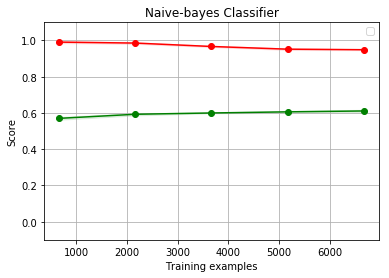

No handles with labels found to put in legend.


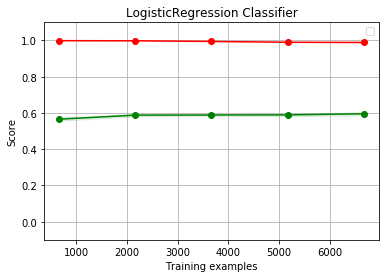

No handles with labels found to put in legend.


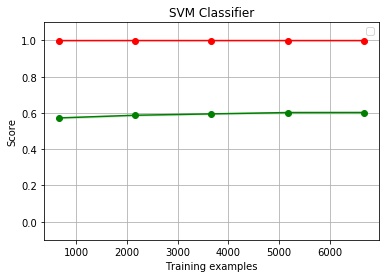

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
No handles with labels found to put in legend.


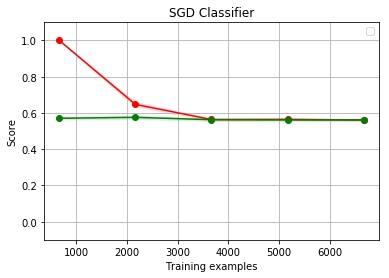

KeyboardInterrupt: 

In [27]:
plot_learing_curve(logR_pipeline_ngram,"Naive-bayes Classifier")
plot_learing_curve(nb_pipeline_ngram,"LogisticRegression Classifier")
plot_learing_curve(svm_pipeline_ngram,"SVM Classifier")
plot_learing_curve(sgd_pipeline_ngram,"SGD Classifier")
plot_learing_curve(random_forest_ngram,"RandomForest Classifier")

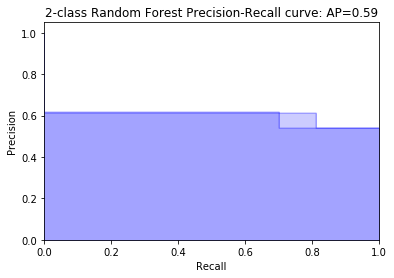

In [28]:
#plotting Precision-Recall curve
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(test_news['Label'], classifier)
    average_precision = average_precision_score(test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    
plot_PR_curve(predicted_LogR_ngram)
plot_PR_curve(predicted_rf_ngram)


In [29]:
def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)

show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
show_most_informative_features(nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
show_most_informative_features(sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')


['3.3294        percent    -2.0936      obamacare', '1.8487        million    -1.8243          obama', '1.7412        average    -1.6493           says', '1.6576            day    -1.5977      wisconsin', '1.6518        georgia    -1.4068            rep', '1.6176           debt    -1.3506     government', '1.6030      countries    -1.2291           care', '1.5747          times    -1.2012           plan', '1.4223        highest    -1.1894      president', '1.3854        country    -1.1783   scott walker', '1.3493           half    -1.1634         walker', '1.3291            000    -1.0760         obamas', '1.2225       american    -1.0427          scott', '1.2138            cut    -1.0121           away', '1.2061         months    -0.9789        clinton', '1.1685         states    -0.9713         barack', '1.1640      americans    -0.9658       medicare', '1.0665           rate    -0.9371       stimulus', '1.0620           year    -0.9208          white', '1.0164             60    -0.8

# Prediction

In [ ]:
import pickle

#doc_new = ['obama is running for president in 2016']

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))


#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)